# Surnjani Djoko May 9th 2022
## Process the test dataset and perform evaluation based on local model

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df_test = pd.read_csv('full_sample/data_set1_test.clean_1.csv')
df_test.shape, display(df_test.head(3))

,date,year,month,day,publication,title_article_cleaned
0,2016-09-21,2016,9.000,21,Reuters,split london madam tussaud separ joli pitt wax...
1,2016-10-10 11:10:04,2016,10.000,10,The New York Times,holiday cook cook sam sifton email reader cook...
2,2016-09-21 14:10:00,2016,9.000,21,People,tiffani trump wear pretti bridesmaid dress aun...


((516831, 6), None)

In [3]:
from nltk.tokenize import word_tokenize

df_test['tokens'] = df_test.apply(lambda row: word_tokenize(row['title_article_cleaned']), axis = 1)

In [4]:
df_test.head(3)

,date,year,month,day,publication,title_article_cleaned,tokens
0,2016-09-21,2016,9.000,21,Reuters,split london madam tussaud separ joli pitt wax...,"[split, london, madam, tussaud, separ, joli, p..."
1,2016-10-10 11:10:04,2016,10.000,10,The New York Times,holiday cook cook sam sifton email reader cook...,"[holiday, cook, cook, sam, sifton, email, read..."
2,2016-09-21 14:10:00,2016,9.000,21,People,tiffani trump wear pretti bridesmaid dress aun...,"[tiffani, trump, wear, pretti, bridesmaid, dre..."


# Prepare test dataset

In [5]:
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
#from gensim.utils import lemmatize, simple_preprocess
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning) 

In [6]:
import spacy
nlp = spacy.load("en_core_web_sm", disable=['parser','ner'])
from gensim.models import Phrases
from gensim.models.phrases import Phraser

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# ------ Form Bigrams
bigram_mod = Phraser.load('full_sample/bigram_model_data_set1_train_clean_2')
#token_words_bigrams = make_bigrams(token_words)
#print(token_words_bigrams)

#token_words_bigrams

# Form Trigrams
trigram_mod = Phraser.load('full_sample/trigram_model_data_set1_train_clean_2')

# --------- getting test dataset ----------
token_words = df_test['tokens']
token_words_trigrams = make_trigrams(token_words)

# Load dictionary and model to evaluate test dataset

In [7]:
DICT_PATH="full_sample/id2word_50k_filtered_full"
    
id2word = corpora.Dictionary.load(DICT_PATH)

In [8]:
with open('full_sample/lda_model_25.pk', 'rb') as pickle_file:
    bestModel = pickle.load(pickle_file)

## Many different ways of showing the topics

In [9]:
# decide which one is the best
from pprint import pprint

pprint(bestModel.print_topics())

[(24,
  '0.031*"tax" + 0.019*"pay" + 0.015*"plan" + 0.013*"worker" + 0.013*"govern" '
  '+ 0.013*"money" + 0.012*"fund" + 0.011*"year" + 0.011*"spend" + '
  '0.011*"cost"'),
 (23,
  '0.027*"busi" + 0.025*"work" + 0.017*"year" + 0.016*"offic" + 0.016*"execut" '
  '+ 0.015*"chief" + 0.014*"new" + 0.013*"help" + 0.013*"compani" + '
  '0.012*"job"'),
 (22,
  '0.029*"market" + 0.025*"percent" + 0.017*"year" + 0.016*"high" + '
  '0.016*"low" + 0.014*"trade" + 0.014*"stock" + 0.013*"rise" + 0.013*"fall" + '
  '0.012*"expect"'),
 (21,
  '0.046*"food" + 0.022*"restaur" + 0.021*"eat" + 0.014*"dog" + 0.013*"drink" '
  '+ 0.010*"store" + 0.009*"anim" + 0.008*"good" + 0.008*"cook" + '
  '0.008*"meat"'),
 (20,
  '0.030*"share" + 0.023*"sale" + 0.022*"compani" + 0.022*"year" + '
  '0.016*"profit" + 0.016*"report" + 0.014*"revenu" + 0.013*"market" + '
  '0.013*"expect" + 0.012*"sell"'),
 (19,
  '0.025*"govern" + 0.021*"unit" + 0.019*"state" + 0.012*"nation" + '
  '0.010*"minist" + 0.008*"foreign" + 0.

In [10]:
# show everything

topics = [[(term, round(wt, 3)) 
               for term, wt in bestModel.show_topic(n, topn=40)] 
                   for n in range(0, bestModel.num_topics)]

for idx, topic in enumerate(topics):
    print('Topic #'+str(idx+1)+':')
    print([term for term, wt in topic])
    print()

Topic #1:
['polic', 'kill', 'attack', 'offic', 'shoot', 'death', 'report', 'man', 'protest', 'tell', 'arrest', 'gun', 'peopl', 'crime', 'murder', 'fire', 'author', 'find', 'investig', 'die', 'prison', 'violenc', 'suspect', 'charg', 'incid', 'accord', 'forc', 'dead', 'victim', 'day', 'statement', 'group', 'local', 'member', 'use', 'later', 'depart', 'car', 'year', 'time']

Topic #2:
['medium', 'social', 'post', 'video', 'twitter', 'facebook', 'news', 'ad', 'user', 'platform', 'use', 'comment', 'stori', 'content', 'internet', 'account', 'share', 'follow', 'messag', 'write', 'report', 'network', 'peopl', 'public', 'page', 'read', 'appear', 'photo', 'fake', 'publish', 'onlin', 'time', 'inform', 'websit', 'send', 'site', 'tweet', 'view', 'new', 'youtub']

Topic #3:
['court', 'case', 'feder', 'law', 'rule', 'state', 'order', 'trial', 'legal', 'file', 'lawyer', 'immigr', 'claim', 'justic', 'protect', 'lawsuit', 'attorney', 'ban', 'charg', 'right', 'allow', 'execut', 'judg', 'govern', 'year', 

In [11]:
topics = bestModel.show_topics(num_topics=25, num_words=5, formatted=False)
topics = sorted(topics, key=lambda x: int(x[0]))
print("Num topics {}".format(len(topics)))
topics

Num topics 25


[(0,
  [('polic', 0.033206135),
   ('kill', 0.019399803),
   ('attack', 0.018491099),
   ('offic', 0.017574705),
   ('shoot', 0.013846519)]),
 (1,
  [('medium', 0.032342464),
   ('social', 0.023551295),
   ('post', 0.021658555),
   ('video', 0.02154407),
   ('twitter', 0.015912931)]),
 (2,
  [('court', 0.028727021),
   ('case', 0.027314793),
   ('feder', 0.021947099),
   ('law', 0.021345442),
   ('rule', 0.021013593)]),
 (3,
  [('use', 0.020006752),
   ('new', 0.014529673),
   ('amazon', 0.0130286915),
   ('technolog', 0.01089144),
   ('product', 0.010095514)]),
 (4,
  [('day', 0.056589197),
   ('week', 0.03654203),
   ('time', 0.030975865),
   ('travel', 0.026854364),
   ('hour', 0.019459708)]),
 (5,
  [('flight', 0.017136564),
   ('air', 0.014983698),
   ('ship', 0.013314338),
   ('fire', 0.009827394),
   ('test', 0.009088419)]),
 (6,
  [('film', 0.02024286),
   ('music', 0.018328153),
   ('play', 0.013313002),
   ('perform', 0.01178998),
   ('new', 0.011139546)]),
 (7,
  [('home', 0

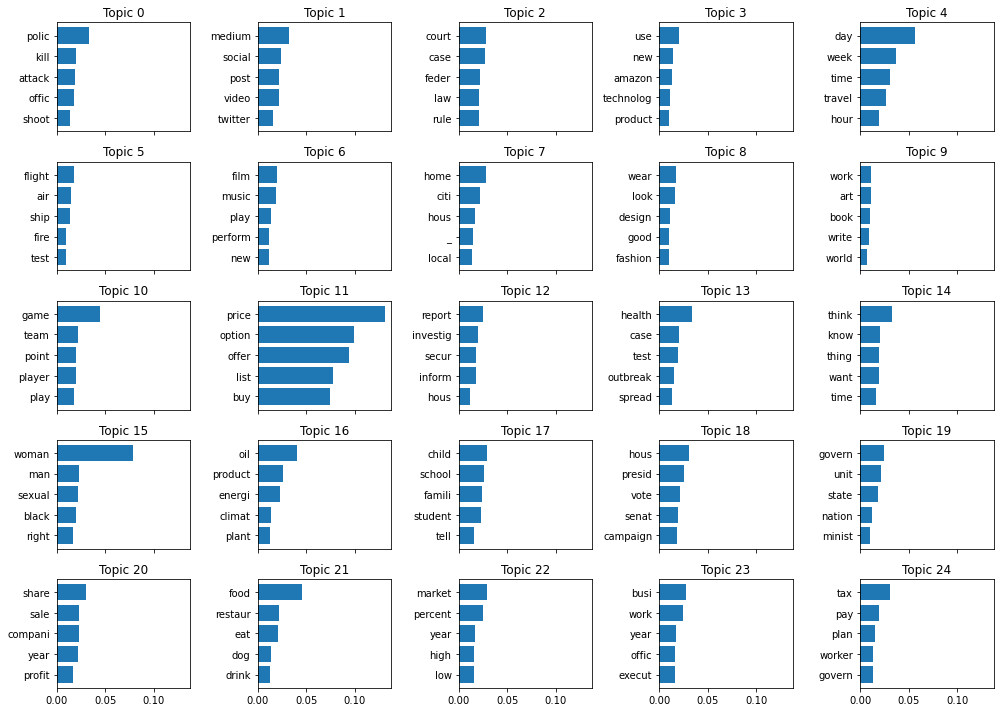

In [12]:
rows = 5
cols = 5
fig, axs = plt.subplots(nrows=rows, ncols=cols, sharex=True, figsize=(14, 10))


for topic_id, word_props in topics:
    row = topic_id // cols
    col = topic_id - (row * cols)
    
    ax = axs[row, col]
    words, probs = zip(*word_props)
    ax.barh(words, probs)
    ax.invert_yaxis()
    ax.set_title('Topic {}'.format(topic_id))

plt.tight_layout()
plt.show()

# There is a bug and import the workaround!

In [13]:
# the work around: https://github.com/RaRe-Technologies/gensim/issues/3040
import logging
            
import numpy as np
from gensim.topic_coherence import direct_confirmation_measure
            
log = logging.getLogger(__name__)
            
ADD_VALUE = 1


def custom_log_ratio_measure(segmented_topics, accumulator, normalize=False, with_std=False, with_support=False):
                    topic_coherences = []
                    num_docs = float(accumulator.num_docs)
                    for s_i in segmented_topics:
                        segment_sims = []
                        for w_prime, w_star in s_i:
                            w_prime_count = accumulator[w_prime]
                            w_star_count = accumulator[w_star]
                            co_occur_count = accumulator[w_prime, w_star]
                
                            if normalize:
                                # For normalized log ratio measure
                                numerator = custom_log_ratio_measure([[(w_prime, w_star)]], accumulator)[0]
                                co_doc_prob = co_occur_count / num_docs
                                m_lr_i = numerator / (-np.log(co_doc_prob + direct_confirmation_measure.EPSILON))
                            else:
                                # For log ratio measure without normalization
                                ### _custom: Added the following 6 lines, to prevent a division by zero error.
                                if w_star_count == 0:
                                    log.info(f"w_star_count of {w_star} == 0. Adding {ADD_VALUE} to the count to prevent error. ")
                                    w_star_count += ADD_VALUE
                                if w_prime_count == 0:
                                    log.info(f"w_prime_count of {w_prime} == 0. Adding {ADD_VALUE} to the count to prevent error. ")
                                    w_prime_count += ADD_VALUE
                                numerator = (co_occur_count / num_docs) + direct_confirmation_measure.EPSILON
                                denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)
                                m_lr_i = np.log(numerator / denominator)
                
                            segment_sims.append(m_lr_i)
                
                        topic_coherences.append(direct_confirmation_measure.aggregate_segment_sims(segment_sims, with_std, with_support))
                
                    return topic_coherences

In [14]:
# overwrite the original function
from gensim.topic_coherence import direct_confirmation_measure
#from my_custom_module import custom_log_ratio_measure
                
direct_confirmation_measure.log_ratio_measure = custom_log_ratio_measure

# Use lemmatization results ...

In [15]:
import pickle

with open("full_sample/AWS_model/trigram_token_lemm.test", "rb") as fp:   # Unpickling
    token_words_trigrams_lemm = pickle.load(fp)

In [16]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=bestModel, texts=token_words_trigrams_lemm, 
                                         dictionary=id2word, coherence='c_v')
    
cv_opt = coherence_model_lda.get_coherence()

cv_opt

0.5226111669570837

In [17]:
test_corpus_lemm = [id2word.doc2bow(text) for text in token_words_trigrams_lemm]

# Perplexity is working!!

In [18]:
# Compute Perplexity: a measure of how successfully a trained topic model predicts new data
print('\nPerplexity: ', bestModel.log_perplexity(test_corpus_lemm))  
# a measure of how good the model is, lower the better.


Perplexity:  -9.34792846203932


# More analysis

In [19]:
len(test_corpus_lemm)

516831

In [20]:
# to get the original back
word_counts = [[(id2word[id], count) for id, count in line] for line in test_corpus_lemm]

In [22]:
# get the topic probability for each document
num_topics = 25
test_vecs = []
for i in range(len(test_corpus_lemm)):
    top_topics = bestModel.get_document_topics(test_corpus_lemm[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(num_topics)]
    test_vecs.append(topic_vec)

In [23]:
prob_cols = ['t0', 't1', 't2', 't3', 't4','t5','t6', 't7', 't8', 't9', 't10',
            't11', 't12', 't13', 't14', 't15','t16', 't17', 't18', 't19', 't20',
            't21', 't22', 't23', 't24']
df_topic_prob = pd.DataFrame(test_vecs, columns=prob_cols)

In [24]:
df_topic_prob.head(3)

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24
0,0.004,0.163,0.003,0.003,0.002,0.002,0.258,0.002,0.002,0.106,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.161,0.001,0.001,0.281,0.001,0.001,0.001,0.001
1,0.001,0.018,0.001,0.000,0.237,0.000,0.103,0.043,0.000,0.090,0.000,0.000,0.000,0.000,0.113,0.000,0.000,0.000,0.000,0.000,0.000,0.392,0.000,0.000,0.000
2,0.002,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.648,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.000,0.308,0.027,0.000,0.000,0.000,0.000,0.000,0.000


In [25]:
# added back the test dataset
df_final_test = df_test.join(df_topic_prob)
df_final_test.head(3)

,date,year,month,day,publication,title_article_cleaned,tokens,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24
0,2016-09-21,2016,9.000,21,Reuters,split london madam tussaud separ joli pitt wax...,"[split, london, madam, tussaud, separ, joli, p...",0.004,0.163,0.003,0.003,0.002,0.002,0.258,0.002,0.002,0.106,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.161,0.001,0.001,0.281,0.001,0.001,0.001,0.001
1,2016-10-10 11:10:04,2016,10.000,10,The New York Times,holiday cook cook sam sifton email reader cook...,"[holiday, cook, cook, sam, sifton, email, read...",0.001,0.018,0.001,0.000,0.237,0.000,0.103,0.043,0.000,0.090,0.000,0.000,0.000,0.000,0.113,0.000,0.000,0.000,0.000,0.000,0.000,0.392,0.000,0.000,0.000
2,2016-09-21 14:10:00,2016,9.000,21,People,tiffani trump wear pretti bridesmaid dress aun...,"[tiffani, trump, wear, pretti, bridesmaid, dre...",0.002,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.648,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.000,0.308,0.027,0.000,0.000,0.000,0.000,0.000,0.000


## Find dominant topic for each test document

In [26]:
df_final_test['highest_prob']=df_final_test[prob_cols].max(axis=1)
df_final_test['highest_topic']=df_final_test[prob_cols].idxmax(axis=1)

In [27]:
df_final_test.head(3)

,date,year,month,day,publication,title_article_cleaned,tokens,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,highest_prob,highest_topic
0,2016-09-21,2016,9.000,21,Reuters,split london madam tussaud separ joli pitt wax...,"[split, london, madam, tussaud, separ, joli, p...",0.004,0.163,0.003,0.003,0.002,0.002,0.258,0.002,0.002,0.106,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.161,0.001,0.001,0.281,0.001,0.001,0.001,0.001,0.281,t20
1,2016-10-10 11:10:04,2016,10.000,10,The New York Times,holiday cook cook sam sifton email reader cook...,"[holiday, cook, cook, sam, sifton, email, read...",0.001,0.018,0.001,0.000,0.237,0.000,0.103,0.043,0.000,0.090,0.000,0.000,0.000,0.000,0.113,0.000,0.000,0.000,0.000,0.000,0.000,0.392,0.000,0.000,0.000,0.392,t21
2,2016-09-21 14:10:00,2016,9.000,21,People,tiffani trump wear pretti bridesmaid dress aun...,"[tiffani, trump, wear, pretti, bridesmaid, dre...",0.002,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.648,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.000,0.308,0.027,0.000,0.000,0.000,0.000,0.000,0.000,0.648,t8


In [28]:
df_final_test.to_csv('full_sample/test_result_prob.csv', index=False)

In [30]:
# https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#18dominanttopicineachsentence
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [31]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=bestModel, 
                                                  corpus=test_corpus_lemm, 
                                                  texts=token_words_trigrams_lemm)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()

In [32]:
# Show
df_dominant_topic.head(10)

,index,Dominant_Topic,Perc_Contribution,Topic_Keywords,0
0,0,20.000,0.281,"share, sale, compani, year, profit, report, re...","[split, separ, wax, museum, say, hollywood, po..."
1,1,21.000,0.392,"food, restaur, eat, dog, drink, store, anim, g...","[holiday, email, reader, day, week, talk, food..."
2,2,8.000,0.648,"wear, look, design, good, fashion, dress, bran...","[bridesmaid, dress, aunt, famili, week, maid, ..."
3,3,4.000,0.453,"day, week, time, travel, hour, event, pm, toda...","[season, watch, digit, pm, host, offici, hope,..."
4,4,4.000,0.205,"day, week, time, travel, hour, event, pm, toda...","[today, local, glaci, today, updat, good, morn..."
5,5,14.000,0.522,"think, know, thing, want, time, good, way, fee...","[interview, real, life, dude, new, junohonor, ..."
6,6,3.000,0.437,"use, new, amazon, technolog, product, datum, c...","[watch, instant, speed, avoid, potenti, techcr..."
7,7,10.000,0.821,"game, team, point, player, play, season, score...","[team, report, insid, pitch, head, season, fig..."
8,8,20.000,0.851,"share, sale, compani, year, profit, report, re...","[brief, sensodetect, right, issu, heavili, jul..."
9,9,20.000,0.554,"share, sale, compani, year, profit, report, re...","[sign, contract, medium, group, contract, medi..."


In [33]:
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
# change to integer for Dominant_Topic
df_dominant_topic['Dominant_Topic'] = df_dominant_topic['Dominant_Topic'].astype('int')

In [34]:
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,20,0.281,"share, sale, compani, year, profit, report, re...","[split, separ, wax, museum, say, hollywood, po..."
1,1,21,0.392,"food, restaur, eat, dog, drink, store, anim, g...","[holiday, email, reader, day, week, talk, food..."
2,2,8,0.648,"wear, look, design, good, fashion, dress, bran...","[bridesmaid, dress, aunt, famili, week, maid, ..."
3,3,4,0.453,"day, week, time, travel, hour, event, pm, toda...","[season, watch, digit, pm, host, offici, hope,..."
4,4,4,0.205,"day, week, time, travel, hour, event, pm, toda...","[today, local, glaci, today, updat, good, morn..."
5,5,14,0.522,"think, know, thing, want, time, good, way, fee...","[interview, real, life, dude, new, junohonor, ..."
6,6,3,0.437,"use, new, amazon, technolog, product, datum, c...","[watch, instant, speed, avoid, potenti, techcr..."
7,7,10,0.821,"game, team, point, player, play, season, score...","[team, report, insid, pitch, head, season, fig..."
8,8,20,0.851,"share, sale, compani, year, profit, report, re...","[brief, sensodetect, right, issu, heavili, jul..."
9,9,20,0.554,"share, sale, compani, year, profit, report, re...","[sign, contract, medium, group, contract, medi..."


In [35]:
df_dominant_topic.to_csv('full_sample/dominant_topic_test.csv', index=False)

In [3]:
df_dominant_topic = pd.read_csv('full_sample/dominant_topic_test.csv')
df_dominant_topic.shape

(516831, 5)

In [4]:
df_dominant_topic['Topic_Perc_Contrib'].describe()

count   516831.000
mean         0.488
std          0.188
min          0.104
25%          0.342
50%          0.450
75%          0.603
max          0.996
Name: Topic_Perc_Contrib, dtype: float64

[Text(0, 0.5, 'Number of Documents'), Text(0.5, 0, 'Topic_%_Contribution')]

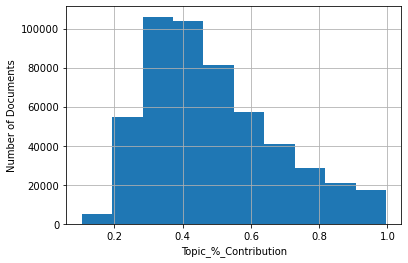

In [6]:
df_dominant_topic['Topic_Perc_Contrib'].hist()
plt.gca().set(ylabel='Number of Documents', xlabel='Topic_%_Contribution')

In [36]:
# what topics have the most number of documents
df_topic_distribution = df_dominant_topic['Dominant_Topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Dominant_Topic', 'Num Documents']
df_topic_distribution.sort_values("Dominant_Topic")

,Dominant_Topic,Num Documents
8,0,20806
18,1,12871
13,2,15986
5,3,31111
23,4,4283
17,5,14222
4,6,31444
21,7,8177
15,8,15241
11,9,17286


In [37]:
df_topic_distribution.sort_values("Num Documents")

,Dominant_Topic,Num Documents
24,11,638
23,4,4283
22,21,6906
21,7,8177
20,23,9502
19,15,10178
18,1,12871
17,5,14222
16,24,15164
15,8,15241


In [38]:
df_topic_distribution.to_csv('full_sample/dominant_topic_distribution_test.csv', index=False)

<AxesSubplot:xlabel='Dominant_Topic'>

<Figure size 2560x1120 with 0 Axes>

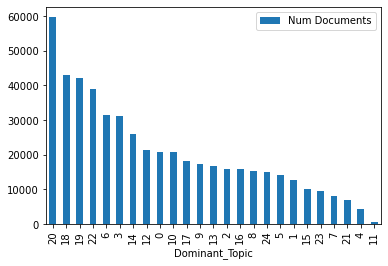

In [39]:
df = df_topic_distribution.set_index('Dominant_Topic')
plt.figure(figsize=(16,7), dpi=160)
df.plot(kind='bar')

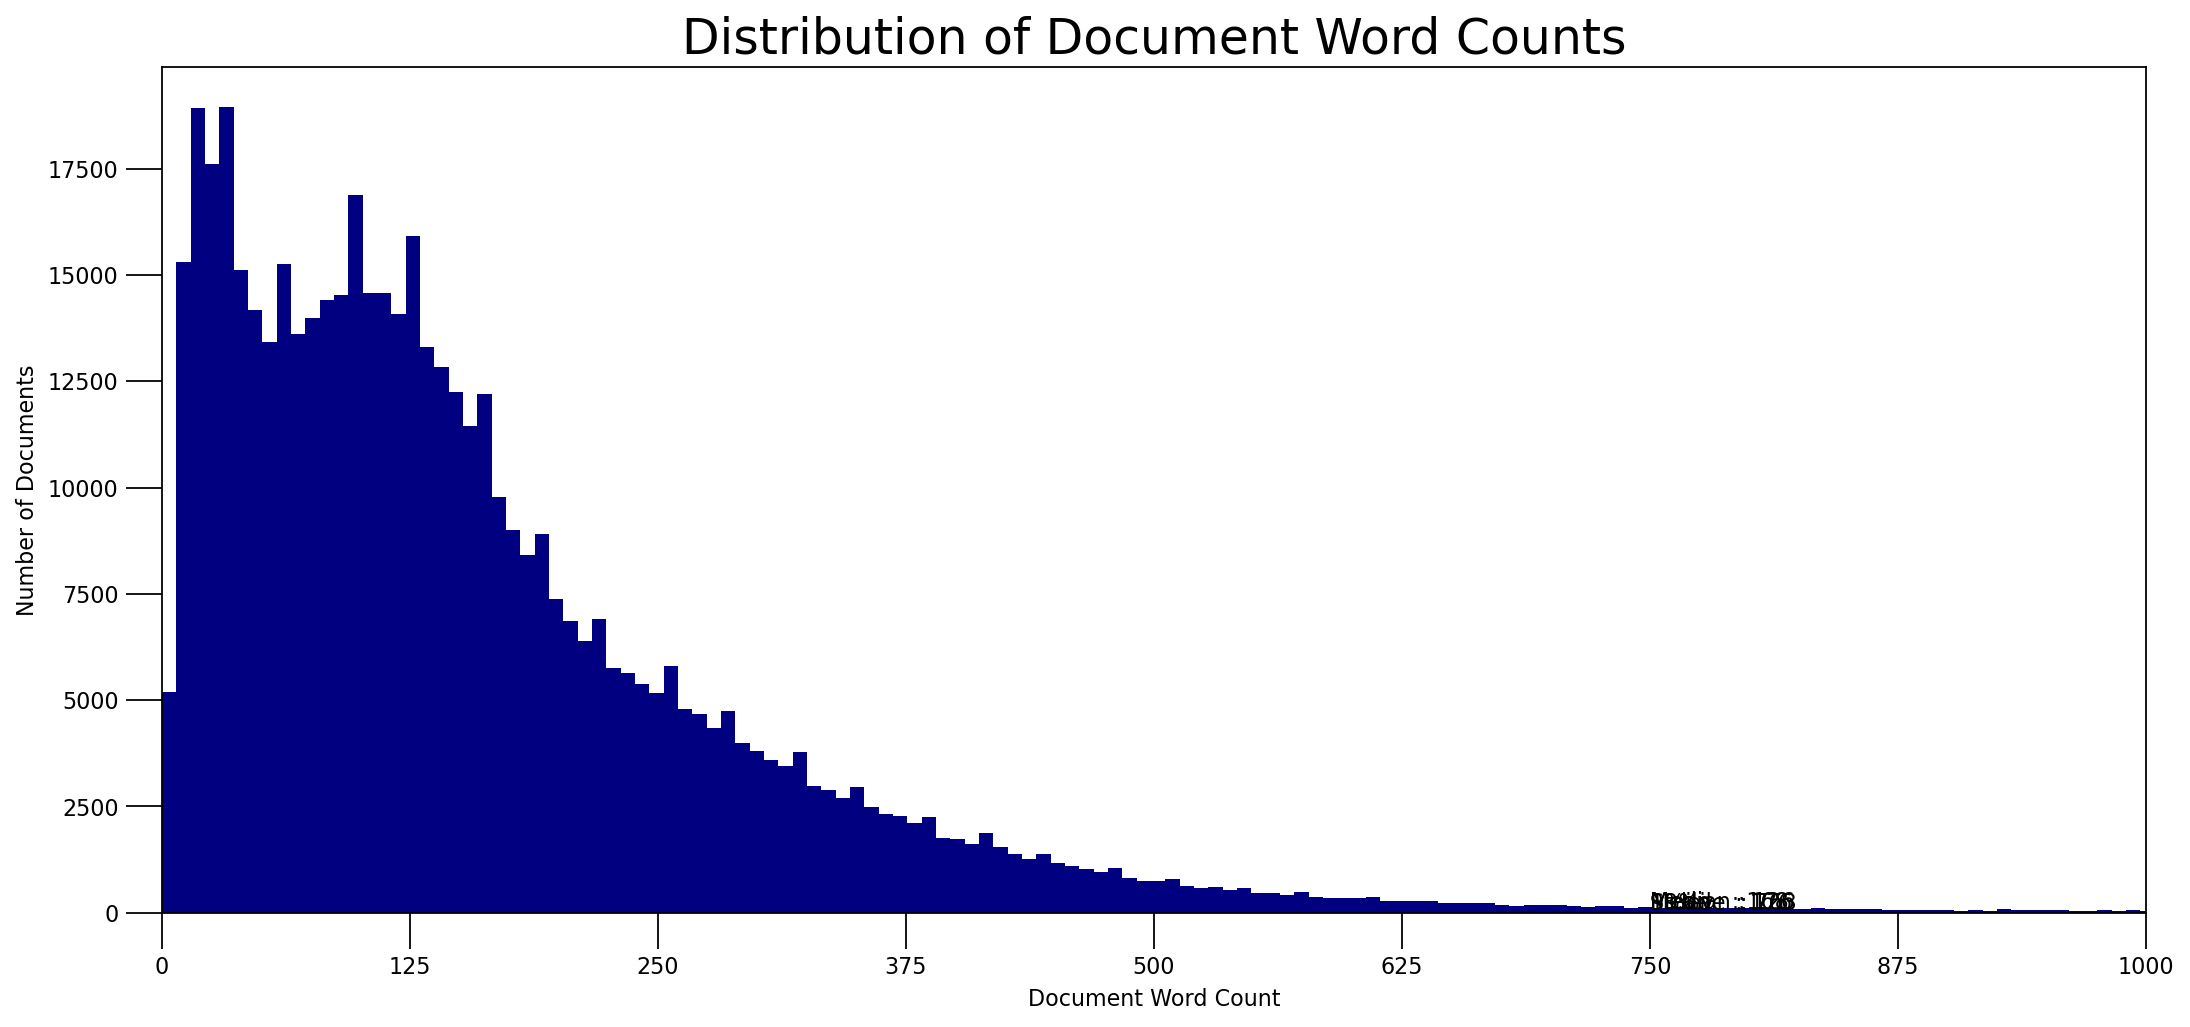

In [40]:

'''
When working with a large number of documents, you want to know how big the documents are as a whole and by topic.
'''
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

In [41]:
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,20,0.281,"share, sale, compani, year, profit, report, re...","[split, separ, wax, museum, say, hollywood, po..."
1,1,21,0.392,"food, restaur, eat, dog, drink, store, anim, g...","[holiday, email, reader, day, week, talk, food..."
2,2,8,0.648,"wear, look, design, good, fashion, dress, bran...","[bridesmaid, dress, aunt, famili, week, maid, ..."
3,3,4,0.453,"day, week, time, travel, hour, event, pm, toda...","[season, watch, digit, pm, host, offici, hope,..."
4,4,4,0.205,"day, week, time, travel, hour, event, pm, toda...","[today, local, glaci, today, updat, good, morn..."
5,5,14,0.522,"think, know, thing, want, time, good, way, fee...","[interview, real, life, dude, new, junohonor, ..."
6,6,3,0.437,"use, new, amazon, technolog, product, datum, c...","[watch, instant, speed, avoid, potenti, techcr..."
7,7,10,0.821,"game, team, point, player, play, season, score...","[team, report, insid, pitch, head, season, fig..."
8,8,20,0.851,"share, sale, compani, year, profit, report, re...","[brief, sensodetect, right, issu, heavili, jul..."
9,9,20,0.554,"share, sale, compani, year, profit, report, re...","[sign, contract, medium, group, contract, medi..."


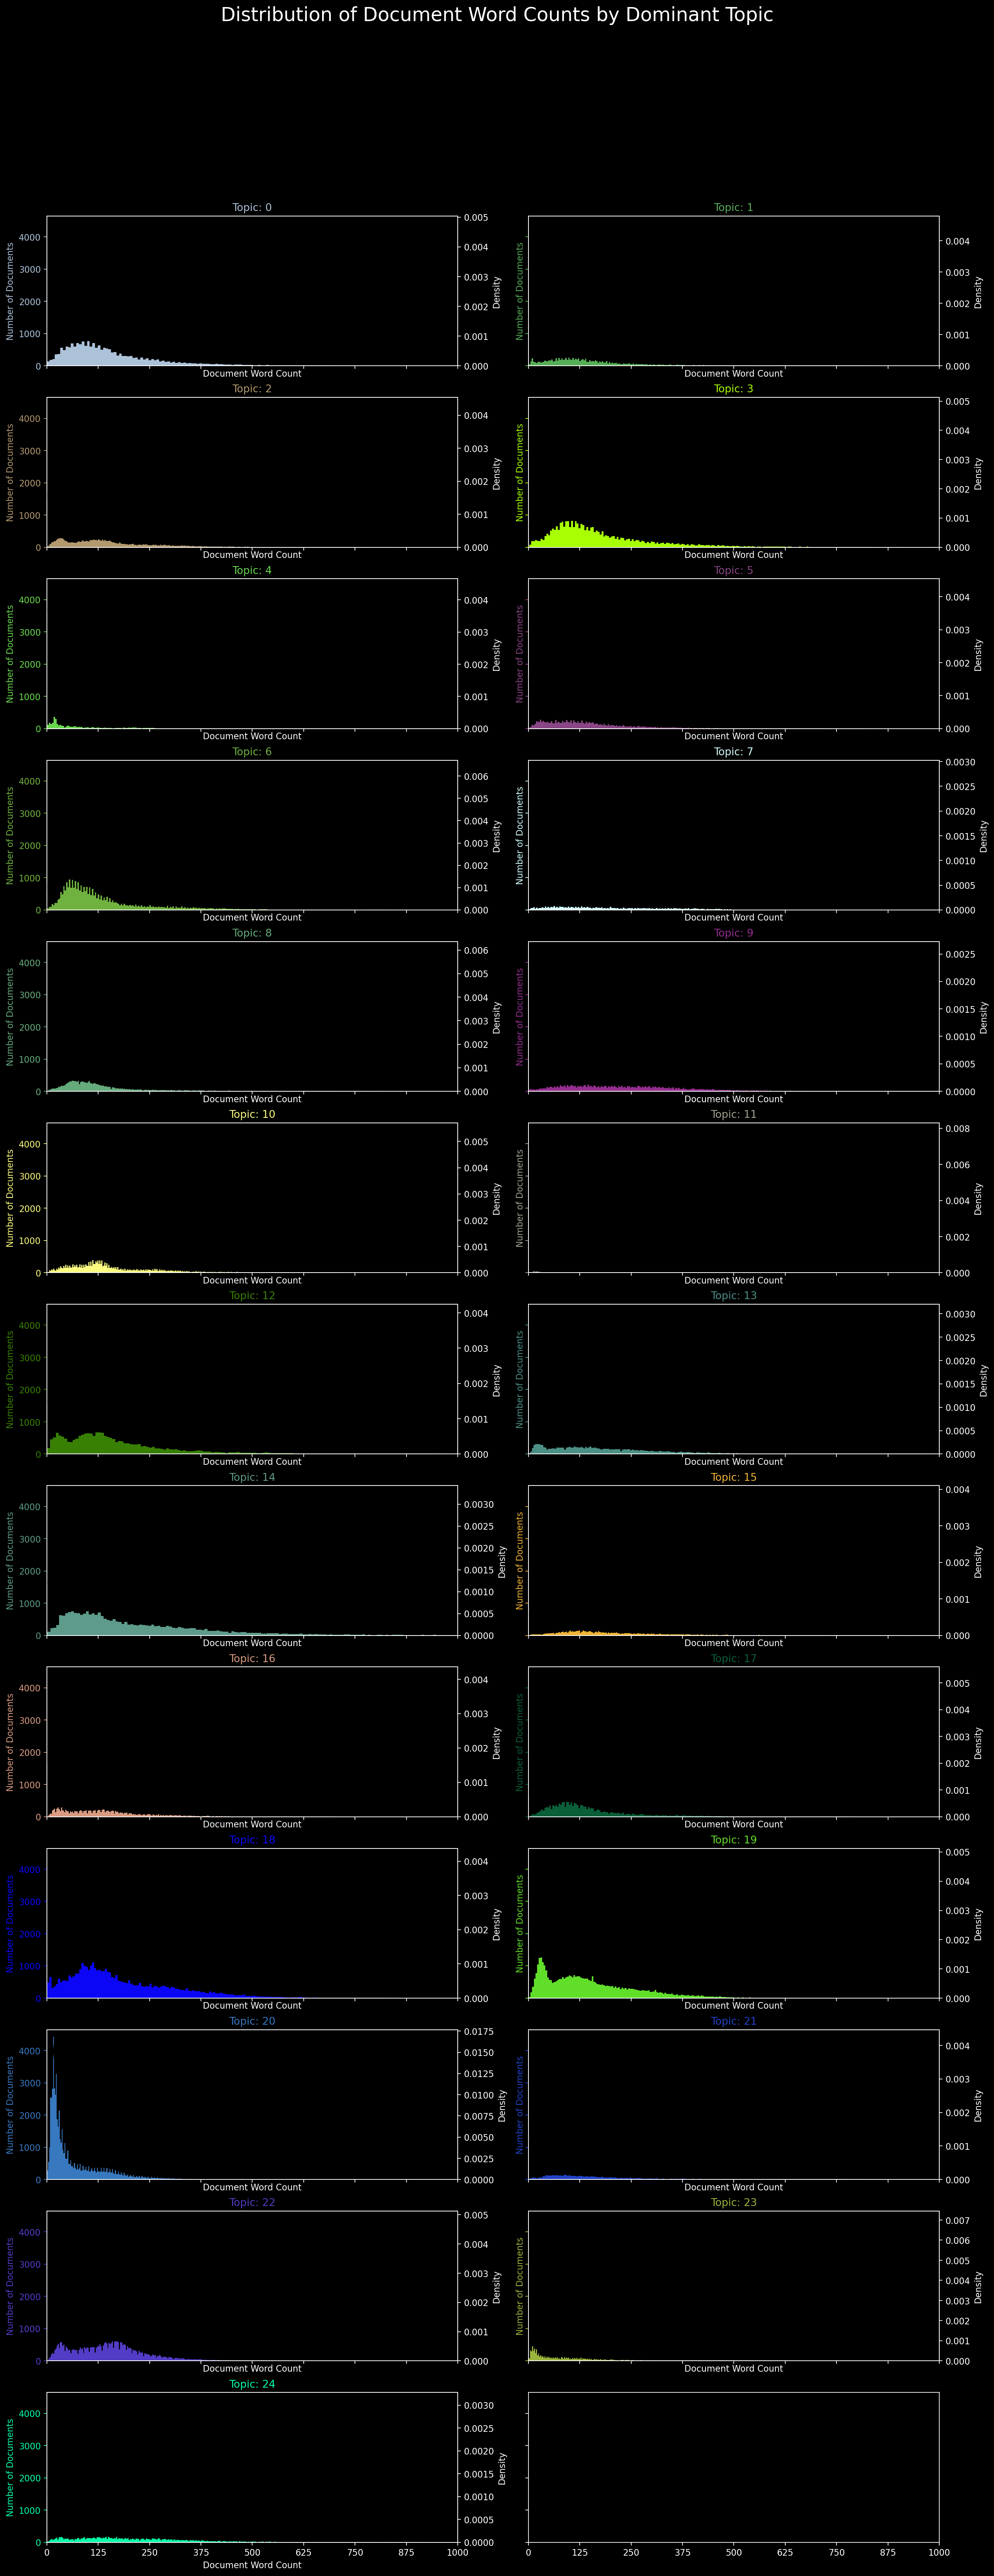

In [42]:
import seaborn as sns
import matplotlib.colors as mcolors
#cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

cols_more = [color for name, color in mcolors.XKCD_COLORS.items()] # more colors: 'mcolors.XKCD_COLORS'
cols = cols_more[0:25]
plt.style.use('dark_background')

#fig, axes = plt.subplots(13,2,figsize=(16*2,14*3), dpi=160)
fig, axes = plt.subplots(13,2,figsize=(16,14*3), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):   
    if (i <= 24):
        df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
        doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
        ax.hist(doc_lens, bins = 1000, color=cols[i])
        ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
        sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
        ax.set(xlim=(0, 1000), xlabel='Document Word Count')
        ax.set_ylabel('Number of Documents', color=cols[i])
        ax.set_title('Topic: '+str(i), fontdict=dict(size=12, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

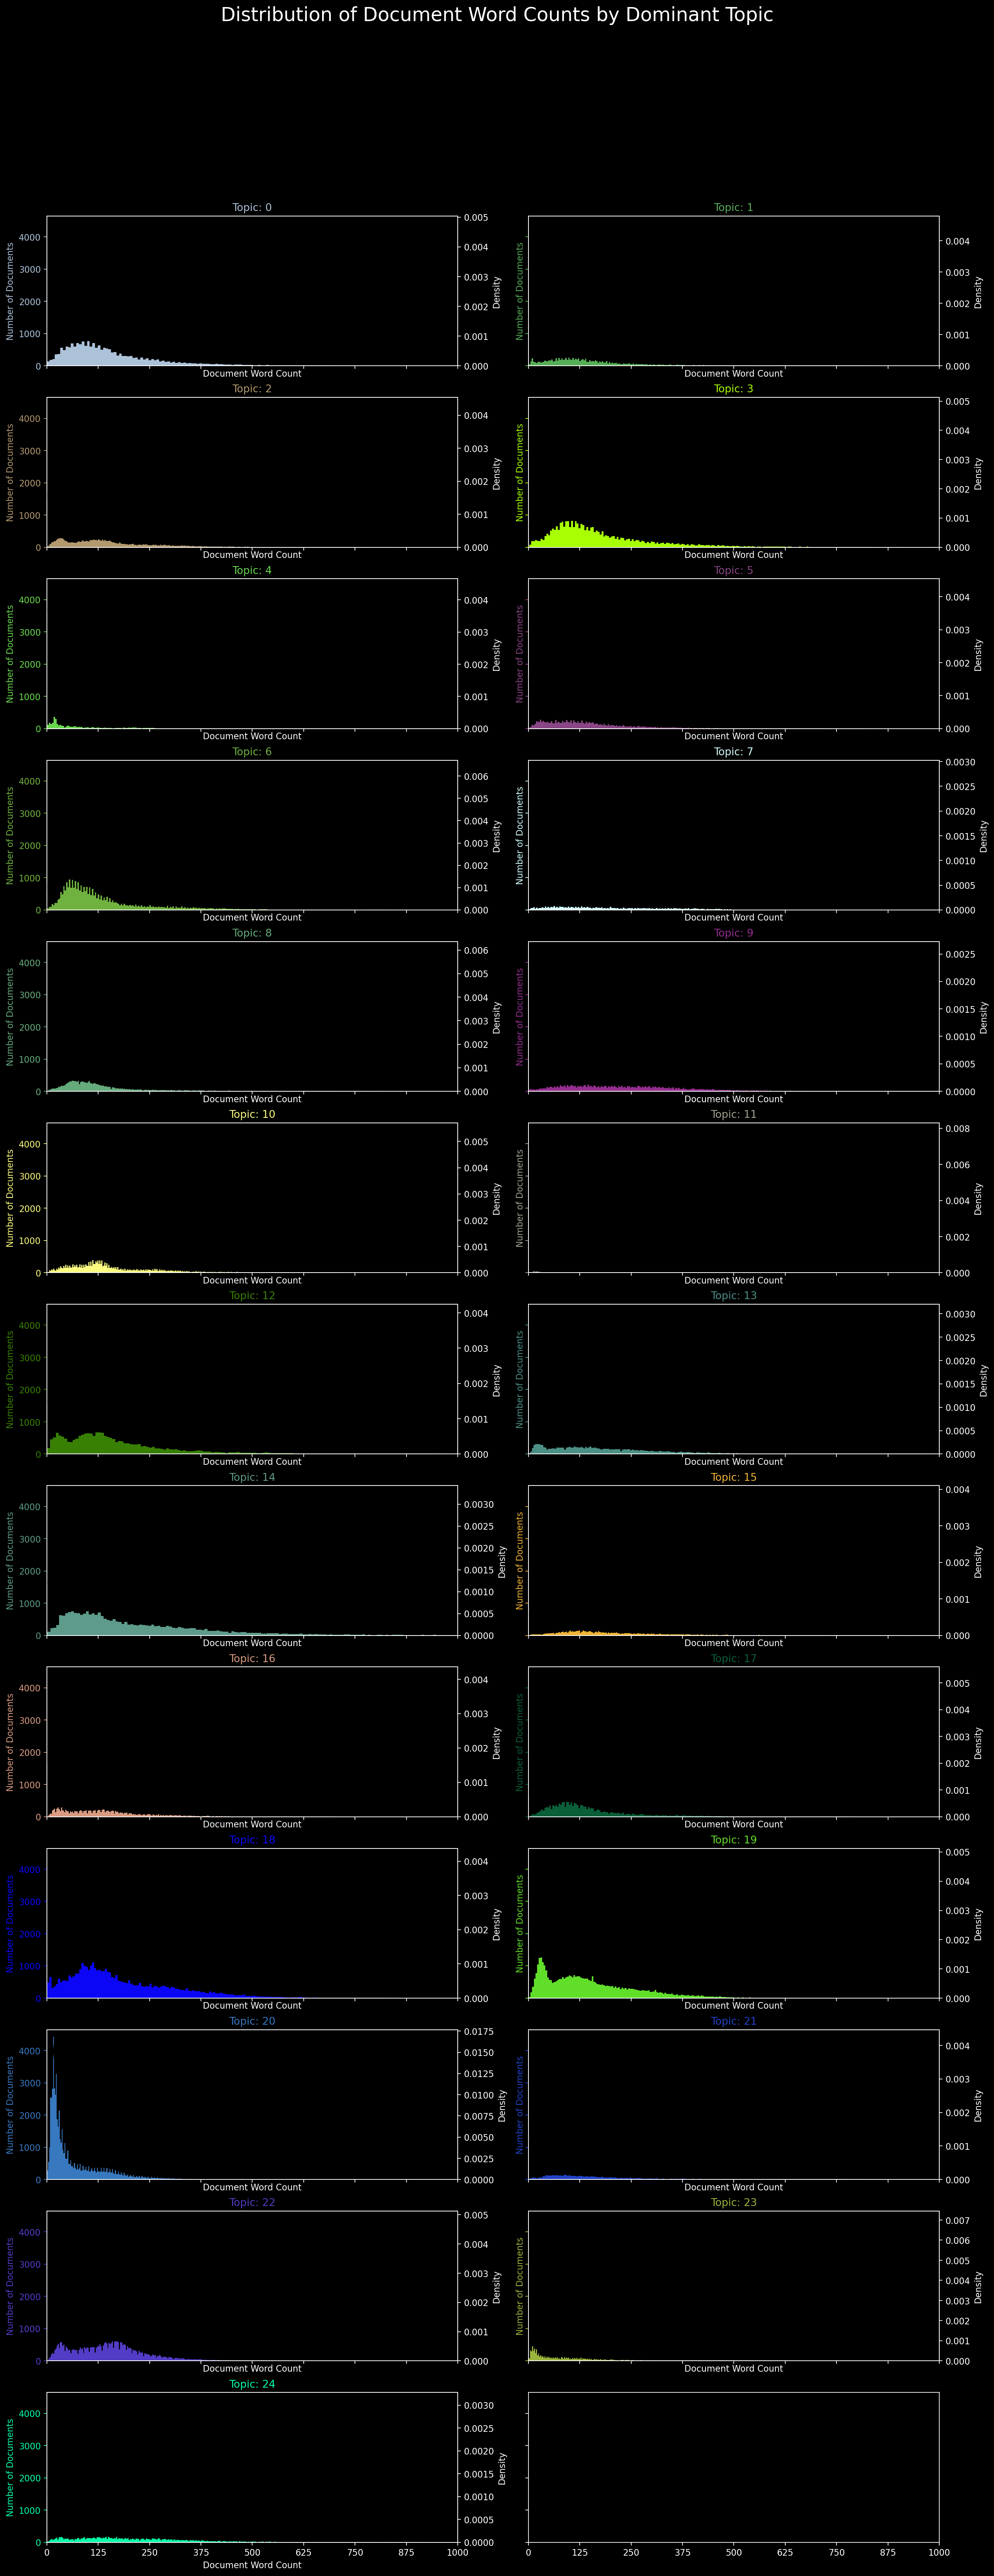

In [43]:
import seaborn as sns
import matplotlib.colors as mcolors
#cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

cols_more = [color for name, color in mcolors.XKCD_COLORS.items()] # more colors: 'mcolors.XKCD_COLORS'
cols = cols_more[0:25]
#plt.style.use('dark_background')

#fig, axes = plt.subplots(13,2,figsize=(16*2,14*3), dpi=160)
fig, axes = plt.subplots(13,2,figsize=(16,14*3), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):   
    if (i <= 24):
        df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
        doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
        ax.hist(doc_lens, bins = 1000, color=cols[i])
        ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
        sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
        ax.set(xlim=(0, 1000), xlabel='Document Word Count')
        ax.set_ylabel('Number of Documents', color=cols[i])
        ax.set_title('Topic: '+str(i), fontdict=dict(size=12, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

## Evaluation (1)

https://msaxton.github.io/topic-model-best-practices/project_overview.html
Topic models do not name the topics provided, so using a topic model for this process is an example of clustering. Therefore, a way of evaluating a topic model is to test how much of the corpus it is able to cluster into groups. For this test I define a function which identifies what percentage of the corpus documents the model is able to assign one topic, to multiple topics, or to no topics at all. The threshold I have decided to use is that a document must have a minimum threshold of 20% to be assigned to a topic. That is to say, 20% of the words used in a document must come from a particular topic if that document is to be clustered with other documents in that topic.

In [44]:
def cluster_test(corpus, model):
    docs_with_1_topic = 0
    docs_with_multiple_topics = 0
    docs_with_no_topics = 0
    total_docs = 0
    for doc in corpus:
        topics = model.get_document_topics(doc, minimum_probability=0.20)
        total_docs += 1
        if len(topics) == 1:
            docs_with_1_topic += 1
        elif len(topics) > 1:
            docs_with_multiple_topics += 1
        else:
            docs_with_no_topics += 1
    print('Corpus assigned to a single topic:', (docs_with_1_topic / total_docs) * 100, '%')
    print('Corpus assigned to multiple topics:', (docs_with_multiple_topics / total_docs) * 100, '%')
    print('corpus assigned to no topics:', (docs_with_no_topics / total_docs) * 100, '%')

In [45]:
cluster_test(test_corpus_lemm, bestModel)

Corpus assigned to a single topic: 45.079339281118976 %
Corpus assigned to multiple topics: 53.61327010183212 %
corpus assigned to no topics: 1.3073906170489 %


## Evaluation (2)

In [46]:
from sklearn.metrics.pairwise import cosine_similarity

#p_df['tokenz'] = df_test['tokens'] # list of finalized tokens ...

docs1 = df_test['tokens'].apply(lambda l: l[:int((len(l)/2))])
docs2 = df_test['tokens'].apply(lambda l: l[int((len(l)/2)):])

corpus1 = [id2word.doc2bow(doc) for doc in docs1]
corpus2 = [id2word.doc2bow(doc) for doc in docs2]

# Using the corpus LDA model tranformation
lda_corpus1 = bestModel[corpus1]
lda_corpus2 = bestModel[corpus2]

In [47]:
from collections import OrderedDict
def get_doc_topic_dist(model, corpus, kwords=False):
    
    '''
    LDA transformation, for each doc only returns topics with non-zero weight
    This function makes a matrix transformation of docs in the topic space.
    '''
    top_dist =[]
    keys = []

    for d in corpus:
        tmp = {i:0 for i in range(num_topics)}
        tmp.update(dict(model[d]))
        vals = list(OrderedDict(tmp).values())
        #print(type(vals))
        top_dist += [np.array(vals)]
        if kwords:
            keys += [np.array(vals).argmax()]

    return np.array(top_dist), keys

top_dist1, _ = get_doc_topic_dist(bestModel, lda_corpus1)
top_dist2, _ = get_doc_topic_dist(bestModel, lda_corpus2)

In [48]:
print("Intra similarity: cosine similarity for corresponding parts of a doc(higher is better):")
print(np.mean([cosine_similarity(c1.reshape(1, -1), c2.reshape(1, -1))[0][0] for c1,c2 in zip(top_dist1, top_dist2)]))

random_pairs = np.random.randint(0, len(df_test['tokens']), size=(400, 2))

print("Inter similarity: cosine similarity between random parts (lower is better):")
print(np.mean([cosine_similarity(top_dist1[i[0]].reshape(1, -1), top_dist2[i[1]].reshape(1, -1)) for i in random_pairs]))

Intra similarity: cosine similarity for corresponding parts of a doc(higher is better):
0.702814801734808
Inter similarity: cosine similarity between random parts (lower is better):
0.27705263228889615


# Test if we could retrieve relavant documents given a document

In [49]:
from gensim import similarities
# build indicies for similarity quiries
index_25 = similarities.MatrixSimilarity(bestModel[test_corpus_lemm]) 

In [50]:
# define retrieval text
def retrieval_test(new_doc, df, lda, index):
    new_bow = id2word.doc2bow(new_doc)  # change new document to bag of words representation
    new_vec = lda[new_bow]  # change new bag of words to a vector
    index.num_best = 10  # set index to generate 10 best results
    matches = (index[new_vec])
    #print(matches)
    scores = []
    for match in matches:
        score = (match[1])
        scores.append(score)
        score = str(score)
        key = 'doc_' + str(match[0])
        '''
        article_dict = doc2metadata[key]
        author = article_dict['author']
        title = article_dict['title']
        year = article_dict['pub_year']
        print(key + ': ' + author.title() + ' (' + year + '). ' + title.title() + '\n\tsimilarity score -> ' + score + '\n')
    
        '''
        title_article = df.iloc[match[0]]['title_article_cleaned']
        year = df.iloc[match[0]]['year']
        pub = df.iloc[match[0]]['publication']
        print(f'key: {key} of title_article: {title_article[0:100]} with similarity score -> {score}')

In [51]:
# test one document....
doc = token_words_trigrams[0]
retrieval_test(doc, df_final_test, bestModel, index_25) 
######## ----- should replace this with df_final_train!!!! (TO DO)

key: doc_236249 of title_article: denni quaid vacat girlfriend laura savoi itali denni quaid laura savoi go strong wednesday yearold a with similarity score -> 0.9289794564247131
key: doc_398287 of title_article: ladi antebellum dave haywood welcom daughter kiss dave haywood new babi girl ladi antebellum guitari with similarity score -> 0.9257945418357849
key: doc_78687 of title_article: violinist stirl say new album brave therapeut new york reuter american violinist lindsey stirl deal  with similarity score -> 0.9147619009017944
key: doc_244012 of title_article: brodi jenner comment ex kaitlynn carter swimsuit photo brodi jenner kaitlynn carter relationship mea with similarity score -> 0.913274347782135
key: doc_430798 of title_article: robin thick girlfriend april love geari pregnant congratul order singer robin thick girlfriend model with similarity score -> 0.9127814173698425
key: doc_97715 of title_article: selena gomez orlando bloom th birthday parti selena gomez orlando bloom en

In [52]:
# test another document....
doc = token_words_trigrams_lemm[100]
retrieval_test(doc, df_final_test, bestModel, index_25) 

key: doc_100 of title_article: ahead job report wall street pressur stock futur mild pressur ahead et releas govern april job repor with similarity score -> 0.9999998807907104
key: doc_65563 of title_article: futur help oil surg trump featur stock futur higher morn gain hold open wall street partial dent rec with similarity score -> 0.9630483984947205
key: doc_467329 of title_article: stock futur higher north korea tension appear eas stock futur higher morn north korea back threaten  with similarity score -> 0.9619982242584229
key: doc_417409 of title_article: wall street set start new month green stock futur higher morn day februari post januari gain dow rid with similarity score -> 0.9586117267608643
key: doc_61655 of title_article: disney like interrupt wall street ralli surpris earn miss dow stock walt disney di key factor weigh  with similarity score -> 0.9521573781967163
key: doc_164098 of title_article: wall street set rise ge slash dividend trump execut order futur higher morn 

In [53]:
# test another document....
doc = token_words_trigrams_lemm[1000]
retrieval_test(doc, df_final_test, bestModel, index_25) 

key: doc_1000 of title_article: watch styliz anim video kati gate lift lo angelesbas electron artist kati gate drop new video track  with similarity score -> 0.9999998211860657
key: doc_245089 of title_article: hugh fordin writer record produc dead hugh fordin versatil behindthescen busi figur write detailfil  with similarity score -> 0.9959088563919067
key: doc_194500 of title_article: golden globe preview award gaga popular film cnnthe golden globe award histor tast star power hit mo with similarity score -> 0.9956663846969604
key: doc_170555 of title_article: popular music collabor rock band give address harvard busi school cv like khale moham khale speak ye with similarity score -> 0.9947693943977356
key: doc_422300 of title_article: vincent nguini guitarist paul simon die vincent nguini guitarist compos cameroon best know long tenu with similarity score -> 0.9934433102607727
key: doc_403762 of title_article: look haydn legaci chamber music societi classic style music principl conc